In [1]:
import numpy as np
from random import shuffle
import matplotlib.pyplot as plt
import pandas as pd
# from scipy.signal import stft, periodogram
from scipy import signal, fft
from scipy.io import wavfile
from scipy.signal import butter, filtfilt, welch, lfilter
import scipy.signal

import tensorflow as tf
import librosa.display
import soundfile
import wave
import IPython.display as ipd

from scipy.io.wavfile import write

# import noisereduce as nr


2023-07-06 21:48:06.017688: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
import numpy as np

def find_highest_frequencies(signal, sample_rate, num_frequencies=2):
    # Apply Fast Fourier Transform (FFT) to the signal
    fft_result = np.fft.fft(signal)
    
    # Calculate the corresponding frequency bins
    frequencies = np.fft.fftfreq(len(signal), 1/sample_rate)
    
    # Find the indices of the highest frequencies
    highest_indices = np.argsort(np.abs(fft_result))[-num_frequencies:][::-1]
    
    # Get the corresponding frequencies and their magnitudes
    highest_frequencies = frequencies[highest_indices]
    highest_magnitudes = np.abs(fft_result[highest_indices])
    
    return highest_frequencies, highest_magnitudes



In [3]:
signal, sampling_rate = librosa.load('/Users/sehwan/Desktop/datasets/bowel_sound/obowel_sound2.wav')

/var/folders/_9/pgqcwl9j27v5p1f9b293n1vc0000gn/T/ipykernel_11527/2559988425.py:1: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sampling_rate = librosa.load('/Users/sehwan/Desktop/datasets/bowel_sound/obowel_sound2.wav')
/Users/sehwan/opt/miniconda3/lib/python3.9/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


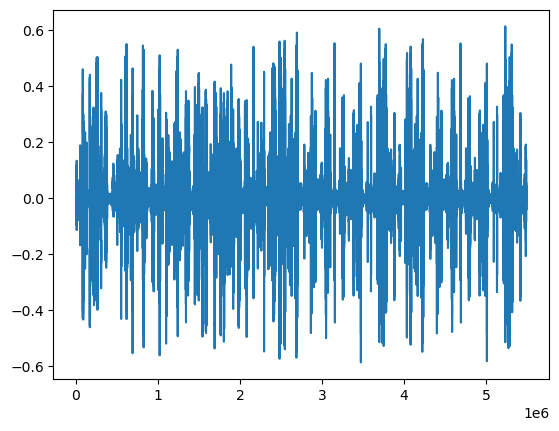

In [4]:
plt.plot(signal)

In [7]:
highest_freqs, highest_magnitudes = find_highest_frequencies(signal, sampling_rate)

highest_freqs, highest_magnitudes

(array([-224.5270199,  224.5270199]), array([2466.53284665, 2466.53284665]))

In [8]:
# Get the frequency spectrum
spectrum = np.fft.fft(signal)

# Determine the frequency resolution and number of frequency bins
sampling_rate = 1000  # Assuming a sampling rate of 1000 Hz
num_samples = len(signal)
frequency_resolution = sampling_rate / num_samples
frequency_bins = np.fft.fftfreq(num_samples, 1 / sampling_rate)


/var/folders/_9/pgqcwl9j27v5p1f9b293n1vc0000gn/T/ipykernel_11527/2700169075.py:11: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto', cmap='jet')


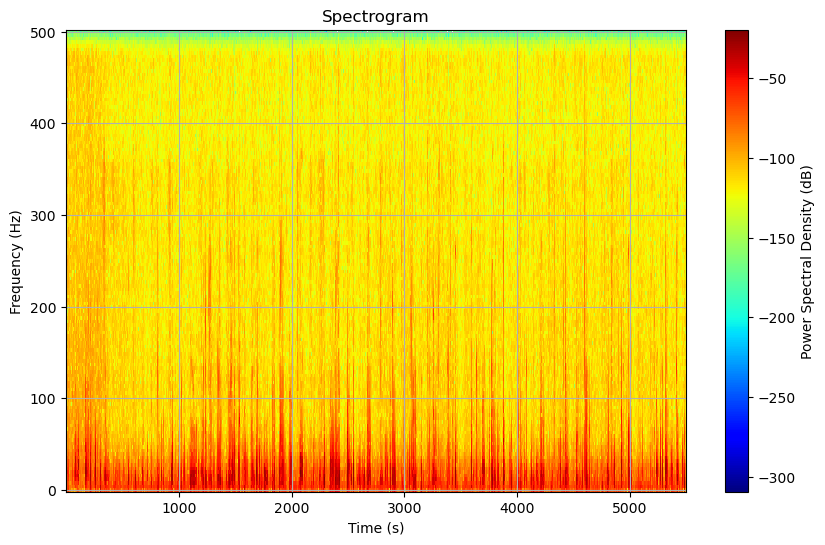

In [18]:
from scipy.signal import spectrogram

window_size = 256  # Size of the analysis window
overlap = 128      # Number of samples for overlap between consecutive windows


frequencies, times, Sxx = spectrogram(signal, fs=sampling_rate, window='hann', nperseg=window_size, noverlap=overlap)

# Visualize the spectrogram
plt.figure(figsize=(10, 6))
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='auto', cmap='jet')
plt.colorbar(label='Power Spectral Density (dB)')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram')
plt.grid(True)

plt.show()

/Users/sehwan/opt/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


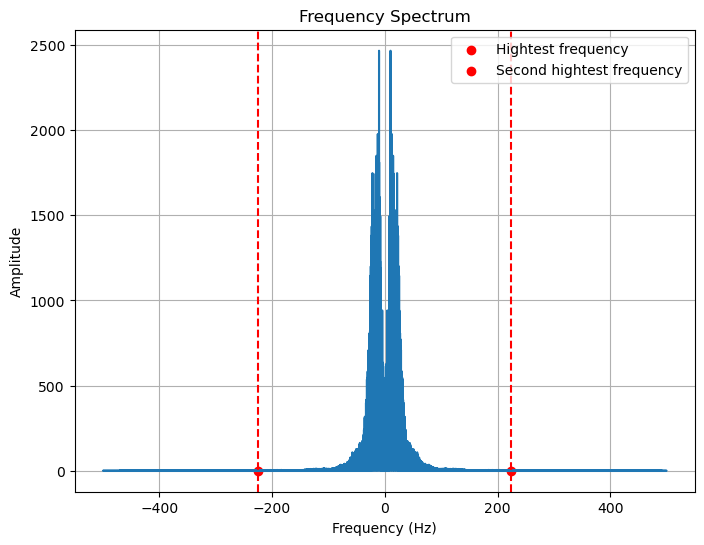

In [14]:

# target_frequency = highest_freqs[0]


# Find the index corresponding to the target frequency
index1 = np.where(np.abs(frequency_bins - highest_freqs[0]) < frequency_resolution/2)[0][0]
index2 = np.where(np.abs(frequency_bins - highest_freqs[1]) < frequency_resolution/2)[0][0]

# Visualize the spectrum
plt.figure(figsize=(8, 6))
plt.plot(frequency_bins, np.abs(spectrum))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.title('Frequency Spectrum')
plt.grid(True)

# Highlight the target frequency
plt.axvline(x=highest_freqs[0], color='r', linestyle='--')
plt.axvline(x=highest_freqs[1], color='r', linestyle='--')
plt.scatter(frequency_bins[index1], np.abs(spectrum[index1]), color='r', label='Hightest frequency')
plt.scatter(frequency_bins[index2], np.abs(spectrum[index2]), color='r', label='Second hightest frequency')
plt.legend()

plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a signal stored in a variable called 'signal'
# and you have already performed the Fourier Transform

# Get the frequency spectrum
spectrum = np.fft.fft(signal)

# Determine the frequency resolution and number of frequency bins
sampling_rate = 1000  # Assuming a sampling rate of 1000 Hz
num_samples = len(signal)
frequency_resolution = sampling_rate / num_samples
frequency_bins = np.fft.fftfreq(num_samples, 1 / sampling_rate)

# Define the target frequency you want to mark on the time domain plot
# target_frequency = highest_freqs[0]  # For example, marking a frequency of 50 Hz

# Find the index corresponding to the target frequency
index1 = np.where(np.abs(frequency_bins - highest_freqs[0]) < frequency_resolution/2)[0][0]
index2 = np.where(np.abs(frequency_bins - highest_freqs[1]) < frequency_resolution/2)[0][0]

# Visualize the signal in the time domain
time = np.arange(0, num_samples) / sampling_rate



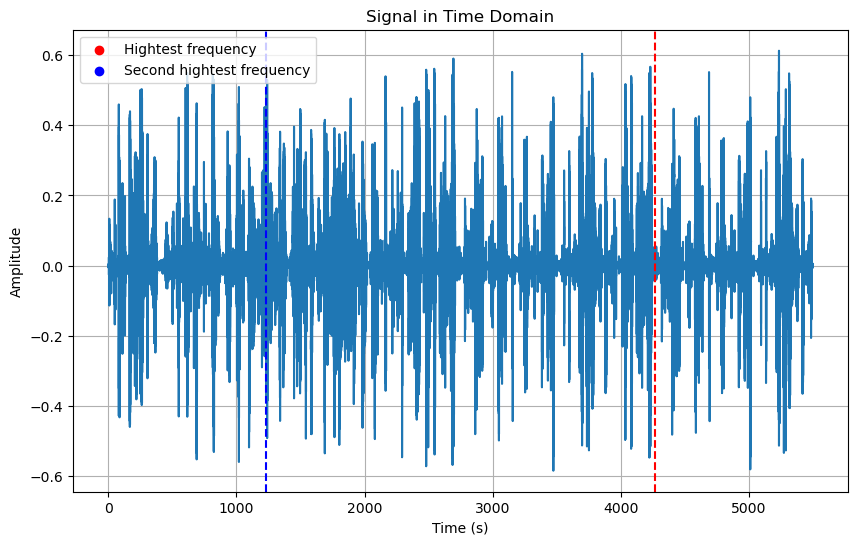

In [25]:
plt.figure(figsize=(10, 6))

# Plot the original signal in the time domain
plt.plot(time, signal)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal in Time Domain')
plt.grid(True)


# Mark the target frequency on the time domain plot
target_time1 = index1 / sampling_rate
target_time2 = index2 / sampling_rate
plt.axvline(x=target_time1, color='r', linestyle='--',)
plt.axvline(x=target_time2, color='blue', linestyle='--',)
plt.scatter(target_time1, signal[int(target_time1 * sampling_rate)], color='r', label='Hightest frequency')
plt.scatter(target_time2, signal[int(target_time2 * sampling_rate)], color='blue', label='Second hightest frequency')

plt.legend()
plt.show()


In [5]:
# Calculate the autocorrelation of the signal
autocorr = librosa.autocorrelate(signal1)

# Find the index of the first peak in the autocorrelation (excluding the first lag)
# first_peak = librosa.util.peak_pick(autocorr, min_distance=int(Fs*0.1), threshold_relative=0.1)
# first_peak = librosa.util.peak_pick(autocorr)
first_peak = librosa.util.peak_pick(autocorr, pre_max=5, post_max=5, pre_avg=5, post_avg=5, delta=0.0, wait=0)


# Calculate the period (in seconds) using the index of the first peak
period = first_peak / Fs

print("Period:", period, "seconds")

Period: [0.00000000e+00 3.90022676e-03 8.25396825e-03 ... 1.19995601e+02
 1.19998186e+02 1.19999955e+02] seconds


[0.00000000e+00 1.99691610e+00 4.22603175e+00 ... 6.14377477e+04
 6.14390712e+04 6.14399768e+04]
[0.00000000e+00 2.00081633e+00 4.23428571e+00 ... 6.15577433e+04
 6.15590694e+04 6.15599767e+04]


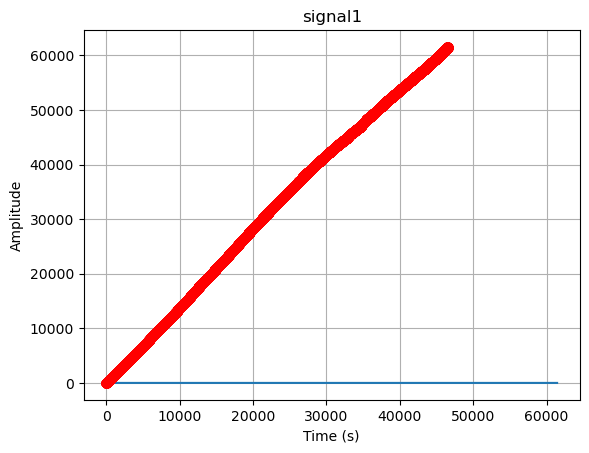

In [7]:
# Plot the signal
time = librosa.times_like(signal1, sr=Fs)
plt.plot(time, signal1)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('signal1')
plt.grid(True)


# Highlight the period
highlight_start = time[first_peak]
highlight_end = highlight_start + period

# for start, end zip(highlight_start, highlight_end):
#     plt.plot()
print(highlight_start) 
print(highlight_end) 

plt.plot(highlight_start, marker='o', color='r')
plt.plot(highlight_end, marker='o', color='r')
plt.show()
# Ensure that highlight_start and highlight_end are single values
# highlight_start = highlight_start.item()
# highlight_end = highlight_end.item()

# plt.plot(time, signal1)
# plt.xlabel('Time (s)')
# plt.ylabel('Amplitude')
# plt.title('Signal with Highlighted Period')
# plt.axvspan(highlight_start, highlight_end, color='r', alpha=0.3)
# plt.grid(True)
# plt.show()

In [8]:
first_peak, time[first_peak], highlight_start, highlight_end

(array([      0,      86,     182, ..., 2645903, 2645960, 2645999]),
 array([0.00000000e+00, 1.99691610e+00, 4.22603175e+00, ...,
        6.14377477e+04, 6.14390712e+04, 6.14399768e+04]),
 array([0.00000000e+00, 1.99691610e+00, 4.22603175e+00, ...,
        6.14377477e+04, 6.14390712e+04, 6.14399768e+04]),
 array([0.00000000e+00, 2.00081633e+00, 4.23428571e+00, ...,
        6.15577433e+04, 6.15590694e+04, 6.15599767e+04]))

In [58]:
ampl = np.abs(fft_freq) * (2/len(fft_freq))
ampl.shape

(35521024,)

In [59]:
# signal.shape, fft_freq.shape, Fs
freq = np.fft.fftfreq(len(signal), 1/Fs)
freq.shape

(35521024,)

In [60]:
fft_freq = freq.copy()
peak_index = ampl[:int(len(ampl)/2)].argsort()[-1]
peak_freq = fft_freq[peak_index]

In [61]:
peak_index

0

In [62]:
fft_lx = fft_freq.copy()
fft_lx[fft_freq != peak_freq] = 0 
filtered_data = 2 * np.fft.ifft(fft_lx)
print(peak_freq)
cycle = round(Fs / peak_freq)

0.0


/var/folders/_9/pgqcwl9j27v5p1f9b293n1vc0000gn/T/ipykernel_1144/78219908.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  cycle = round(Fs / peak_freq)


OverflowError: cannot convert float infinity to integer

In [ ]:
# filtered_data.shape 
# plt.plot(filtered_data[:400], marker='o', color='darkgreen', alpha=0.3)
filtered_data[0], filtered_data[1], filtered_data[2]

((0.0004672803014346571+0j),
 (-0.00033326570954730255+0.00032754365655404926j),
 (8.091901583826364e-06-0.0004672102323768408j))

/Users/sehwan/opt/miniconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


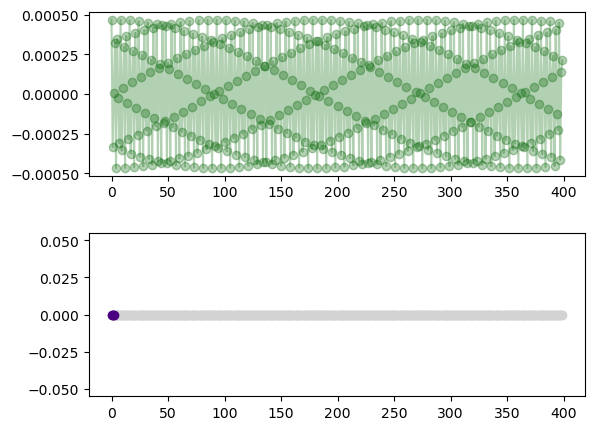

In [52]:
plt.subplot(2, 1, 1)
plt.plot(filtered_data[:400], marker='o', color='darkgreen', alpha=0.3)

plt.subplot(2, 1, 2)
plt.plot(signal[:400], marker='o', color='lightgrey')
plt.plot(signal[:cycle], marker='o', color='indigo')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35) 
plt.show()

In [20]:
# sample_rate, data = wavfile.read('/content/drive/MyDrive/Colab_Notebooks/denoise/output.wav', 'r')
input_audio, sr = librosa.load('/Users/sehwan/Desktop/datasets/batch 2/Bowel_sound_normal_C_de.wav')
# input_audio = np.loadtxt('/Users/sehwan/Desktop/datasets/batch 2/pure tune/500Hz.txt', delimiter='\t')
# input_audio = input_audio[:sr*600]S
# sr = 500 

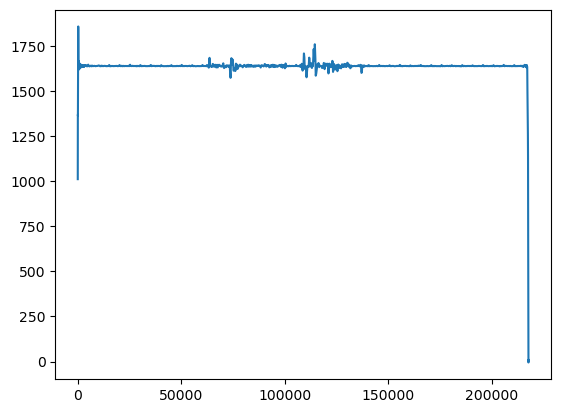

In [21]:
plt.plot(input_audio)

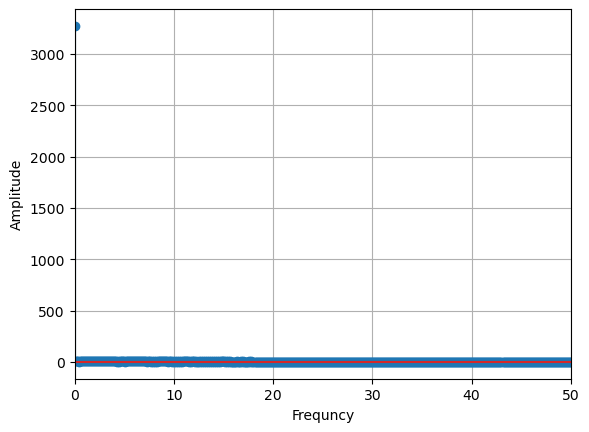

In [22]:
S_fft = np.fft.fft(input_audio)
ampl = abs(S_fft) * (2/len(S_fft))
freq = np.fft.fftfreq(len(S_fft), 1/sr)

plt.xlim(0, 50)
plt.stem(freq, ampl)
plt.grid(True)
plt.xlabel('Frequncy')
plt.ylabel('Amplitude')
plt.show() 

In [9]:
fft_freq = freq.copy()
peak_index = ampl[:int(len(ampl)/2)].argsort()[-1]
peak_freq = fft_freq[peak_index]

In [12]:
fft_lx = S_fft.copy()
fft_lx[fft_freq != peak_freq] = 0
filtered_data = 2 * np.fft.ifft(fft_lx)
# cycle = round(sr / peak_freq)

sr, peak_freq

(500, 0.0)

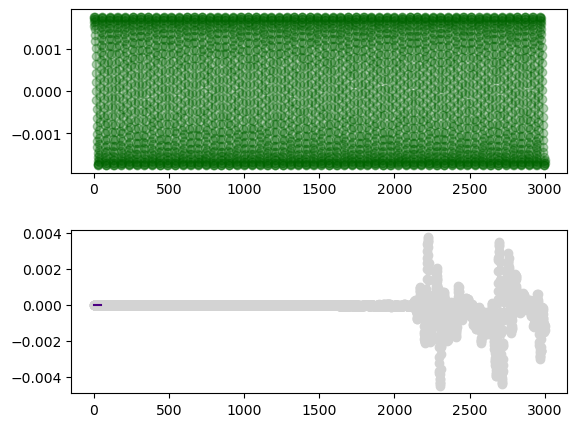

In [12]:
plt.subplot(2, 1, 1)
plt.plot(filtered_data[:3000], marker='o', color='darkgreen', alpha=0.3)

plt.subplot(2, 1, 2)
plt.plot(input_audio[:3000], marker='o', color='lightgrey')
plt.plot(input_audio[:cycle], color='indigo')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)

In [6]:
X_norm = [] 
X_bowel = [] 

for ii in range(len(input_audio) // 300):
    sig = input_audio[ii*300 : (ii+1)*300]
    rms = np.sqrt(np.nanmean(sig ** 2))
    
    if rms > 0:
        X_bowel.append(sig)
    else:
        X_norm.append(sig)
        
         
X_bowel = np.array(X_bowel).reshape([-1, 300])
X_norm = np.array(X_norm).reshape([-1, 300])

X_bowel.shape, X_norm.shape

((118386, 300), (17, 300))

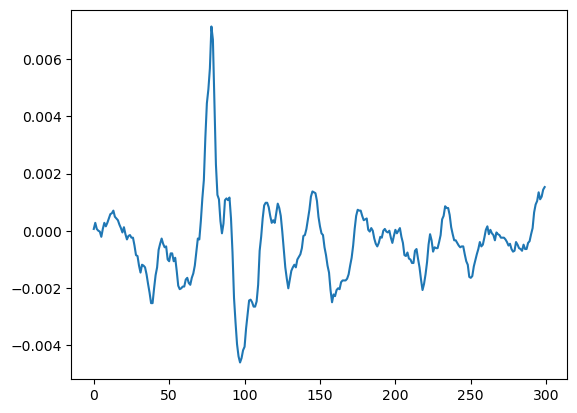

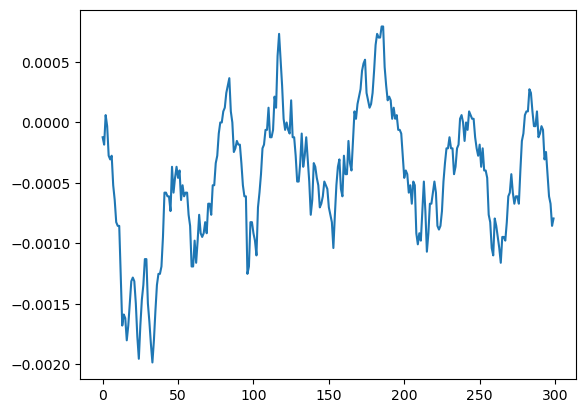

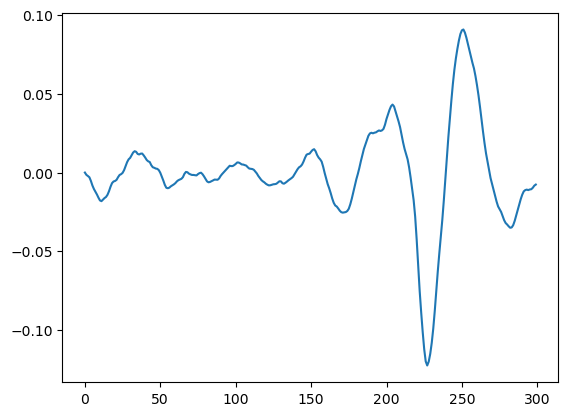

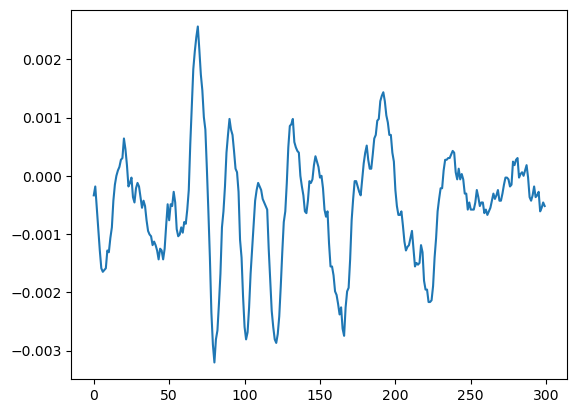

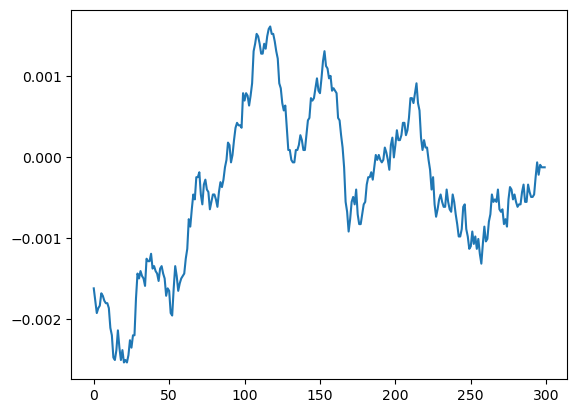

In [8]:
for _ in range(5):
    num = np.random.randint(118386)
    
    plt.plot(X_bowel[num])
    plt.show()

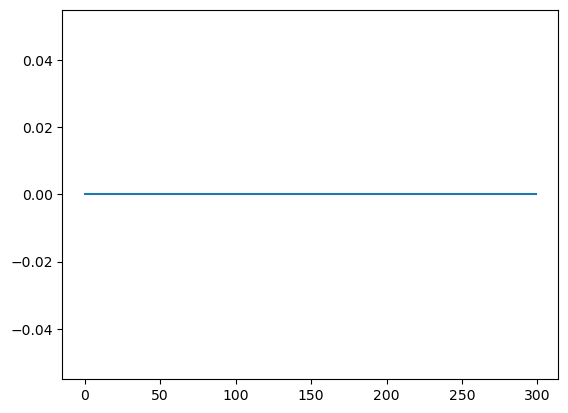

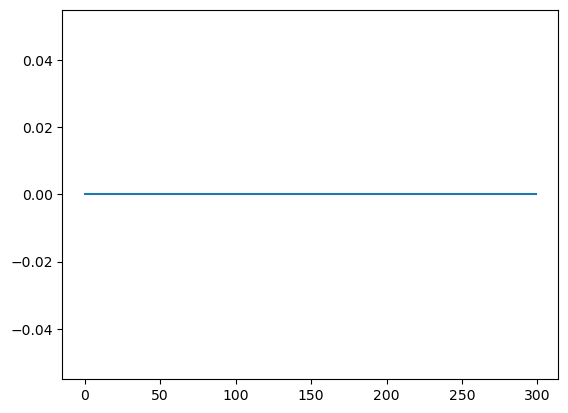

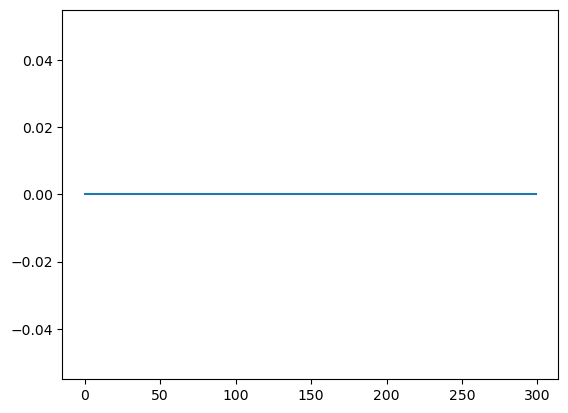

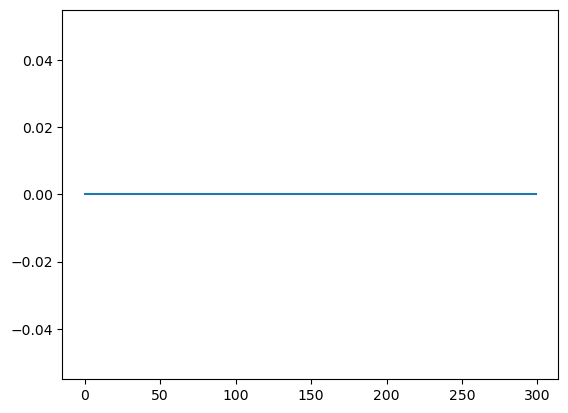

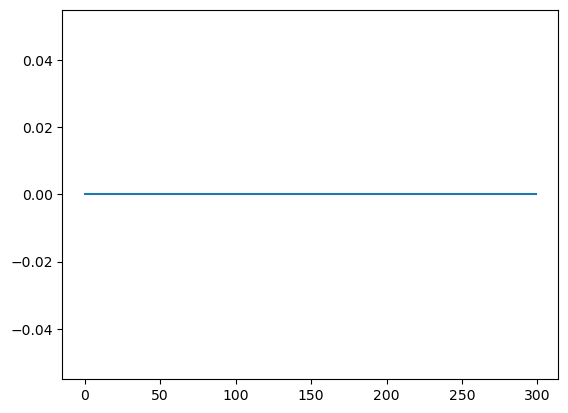

In [10]:
for _ in range(5):
    num = np.random.randint(17)
    
    plt.plot(X_norm[num])
    plt.show()

In [6]:
S = librosa.core.stft(input_audio, n_fft=1024, hop_length=512, win_length=1024)
print(S.shape, len(S[0]), S[0][0])

(513, 69378) 69378 0j


In [7]:
D = np.abs(S) ** 2
print(D.shape) # shape은 동일

(513, 69378)


/var/folders/_9/pgqcwl9j27v5p1f9b293n1vc0000gn/T/ipykernel_8678/3662453179.py:1: UserWarning: power_to_db was called on complex input so phase information will be discarded. To suppress this warning, call power_to_db(np.abs(D)**2) instead.
  log_S = librosa.power_to_db(S, ref=np.max)#소리의 단위를 db로 바꿈


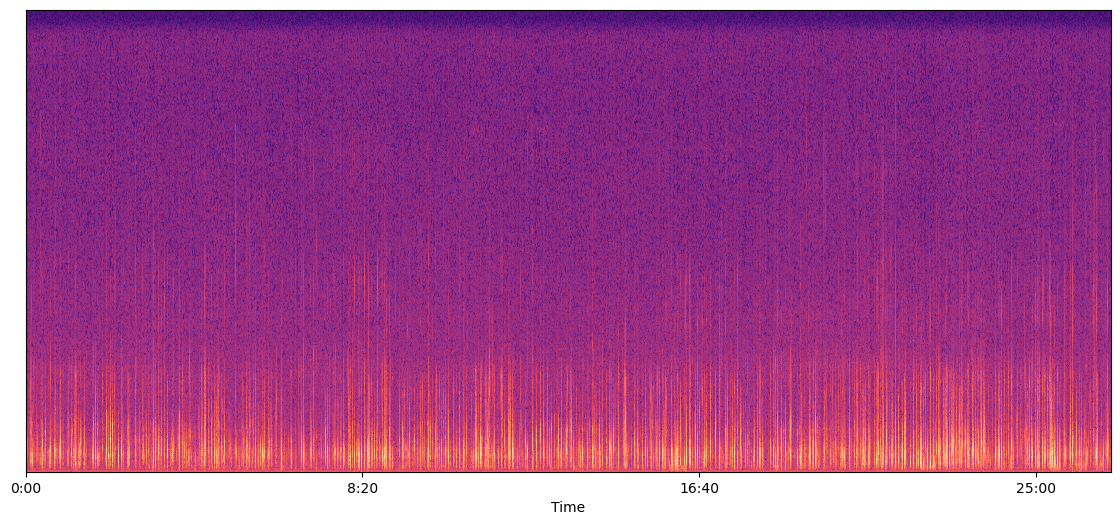

In [9]:
log_S = librosa.power_to_db(S, ref=np.max)#소리의 단위를 db로 바꿈 

plt.figure(figsize=(14, 6))
librosa.display.specshow(log_S, sr=sr, x_axis='time')
plt.show()

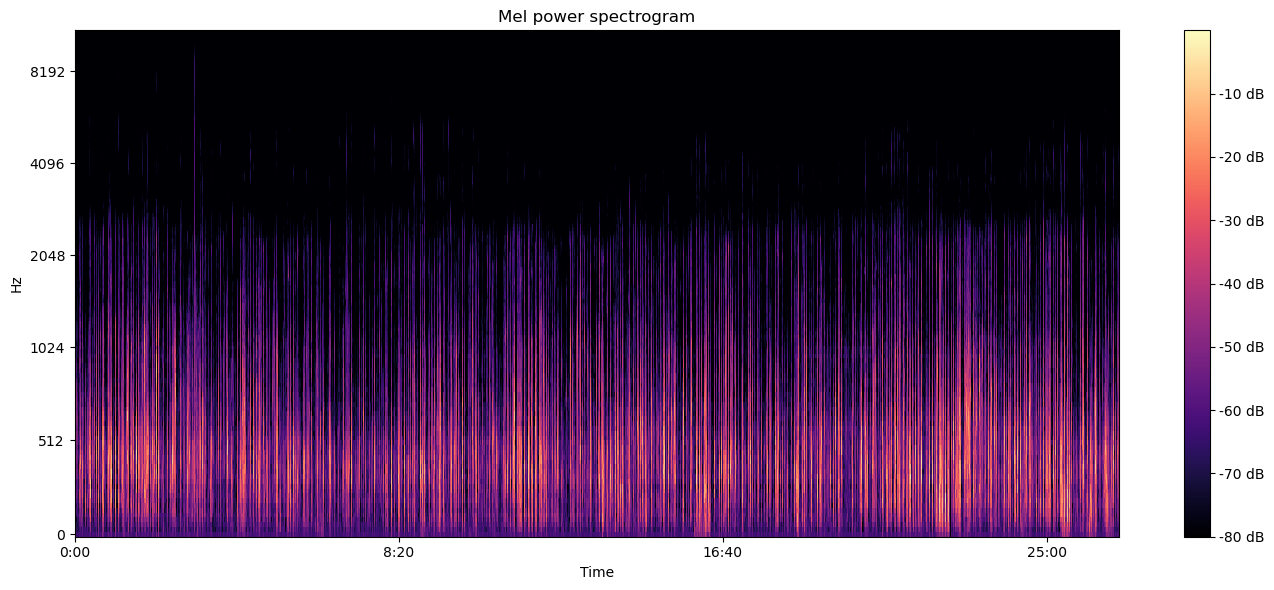

In [11]:
S = librosa.feature.melspectrogram(y=input_audio, sr=sr, n_mels=128)
log_S = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(14, 6))
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')
plt.title("Mel power spectrogram")
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

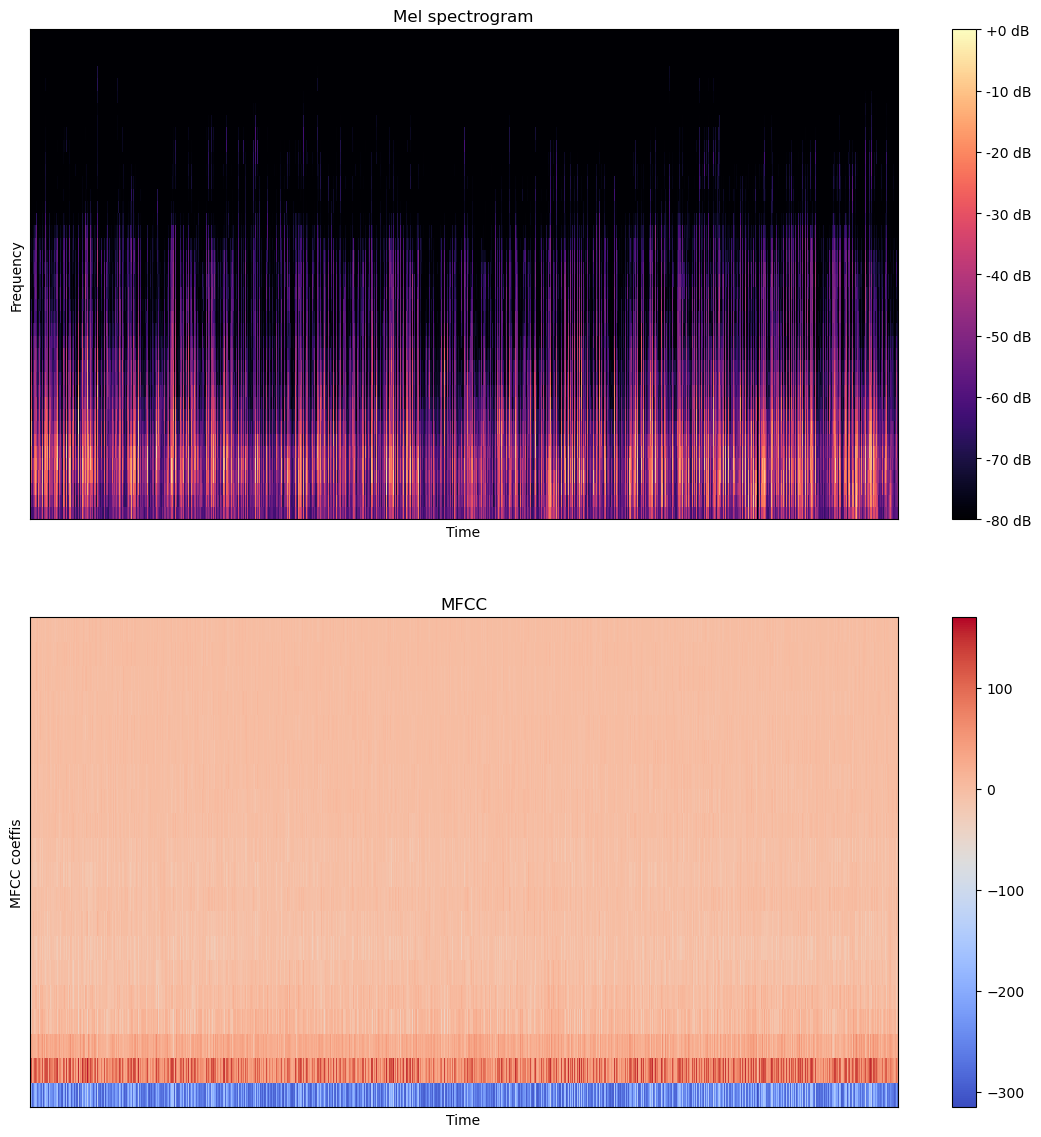

In [14]:
plt.figure(figsize=(14,14))
ax = plt.subplot(2, 1, 1)


ax = plt.subplot(2, 1, 1)
S = librosa.feature.melspectrogram(y=input_audio, sr=sr, n_mels=40)
log_S = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(log_S, sr=sr)
plt.title('Mel spectrogram')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')

ax = plt.subplot(2, 1, 2)
mfcc = librosa.feature.mfcc(y=input_audio, sr=sr, n_mels=40)
librosa.display.specshow(mfcc, sr=sr)
plt.title('MFCC')
plt.xlabel("Time")
plt.ylabel("MFCC coeffis")
plt.colorbar()